<a href="https://colab.research.google.com/github/azario0/Alphabeta-minmax/blob/main/minmax%2Calphabeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import time
import plotly.express as px
import math
import matplotlib.pyplot as plt

In [6]:
def min_max(number1,number2,indice):
    if indice == -1 :
        return min(number1,number2)
    else :
        return max(number1,number2)

In [8]:
array = np.random.randint(11, size=101)

In [9]:
def min_max_algo(arr):
    sign = 1
    length_of_tab=len(arr)
    number_of_turns=0
    while(length_of_tab>=1):
        length_of_tab/=2
        number_of_turns+=1
    current_tab = arr.copy()

    for j in range(number_of_turns):
        
        final_tab=[]
        for i in range(0,len(current_tab),2) : 
            try:
                best_val = min_max(current_tab[i],current_tab[i+1],sign)
            except IndexError:
                best_val=current_tab[i]
            final_tab.append(best_val)
        current_tab=final_tab.copy()
        
        sign*=-1


In [10]:
min_max_v1=[]
tab_of_size_v1=[]
siz=100
for j in range(20):
    siz = siz*2
    tab_of_size_v1.append(siz)
    array = np.random.randint(11, size=siz)
    start_time = time.time()
    min_max_algo(array)
    min_max_v1.append(time.time() - start_time)
    

In [11]:

def min_max_v2(arr):
    sign = 1
    number_of_turns = round(math.log2(len(array)))
    current_tab = arr
    for j in range(number_of_turns):
        final_tab=[]
        for i in range(0,len(current_tab),2) : 
            try:
                final_tab.append(min_max(current_tab[i],current_tab[i+1],sign))
            except IndexError:
                final_tab.append(current_tab[i])
        current_tab=final_tab.copy()
        sign*=-1


In [12]:
time_min_max_v2_time=[]
tab_of_size_v2=[]
siz=100
for i in range(20):
    siz = siz*2
    tab_of_size_v2.append(siz)
    array = np.random.randint(11, size=siz)
    start_time = time.time()
    min_max_v2(array)
    time_min_max_v2_time.append(time.time() - start_time)
    

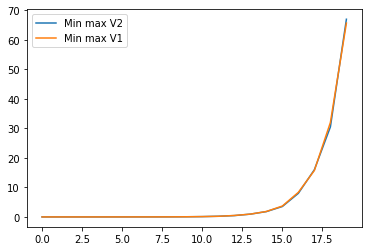

In [13]:
line1 = plt.plot(range(len(tab_of_size_v2)),time_min_max_v2_time)
line2 = plt.plot(range(len(tab_of_size_v1)),min_max_v1)
plt.legend(['Min max V2', 'Min max V1'])
plt.show()

In [14]:
data = {"min_max_v1_time":min_max_v1,"min_max_v2_time":time_min_max_v2_time,"length_data":tab_of_size_v2}
df = pd.DataFrame(data)

In [15]:
# print("Time difference : \n",df["min_max_v1_time"]-df["min_max_v2_time"])
print("Time difference sum : ",sum(df["min_max_v1_time"]-df["min_max_v2_time"]))

Time difference sum :  0.5319955348968506


In [16]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter( x=df['length_data'], y=df['min_max_v1_time'],
                    mode='lines+markers',
                    name='Min max Version 1'))

fig.add_trace(go.Scatter(x=df['length_data'], y=df['min_max_v2_time'],
                    mode='lines+markers',
                    name='Min max Version 2'))

fig.update_layout(title='Time execusion by length of data',
                   xaxis_title='Data length',
                   yaxis_title='Time')
fig.show()

In [28]:
# Python3 program to demonstrate
# working of Alpha-Beta Pruning

# Initial values of Alpha and Beta
MAX, MIN = 1000, -1000

# Returns optimal value for current player
#(Initially called for root and maximizer)
def minimax(depth, nodeIndex, maximizingPlayer,
			values, alpha, beta):

	# Terminating condition. i.e
	# leaf node is reached
	if depth == 3:
		return values[nodeIndex]

	if maximizingPlayer:
	
		best = MIN

		# Recur for left and right children
		for i in range(0, 2):
			
			val = minimax(depth + 1, nodeIndex * 2 + i,
						False, values, alpha, beta)
			best = max(best, val)
			alpha = max(alpha, best)

			# Alpha Beta Pruning
			if beta <= alpha:
				break
		
		return best
	
	else:
		best = MAX

		# Recur for left and
		# right children
		for i in range(0, 2):
		
			val = minimax(depth + 1, nodeIndex * 2 + i,
							True, values, alpha, beta)
			best = min(best, val)
			beta = min(beta, best)

			# Alpha Beta Pruning
			if beta <= alpha:
				break
		
		return best
	





In [18]:
alpha_beta_v1_time=[]
alpha_beta_v1=[]
siz=100
for i in range(20):
    siz = siz*2
    alpha_beta_v1.append(siz)
    array = np.random.randint(11, size=siz)
    start_time = time.time()
    minimax(0, 0, True, array, MIN, MAX)
    alpha_beta_v1_time.append(time.time() - start_time)

In [19]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter( x=df['length_data'], y=df['min_max_v1_time'],
                    mode='lines+markers',
                    name='Min max Version 1'))

fig.add_trace(go.Scatter(x=df['length_data'], y=df['min_max_v2_time'],
                    mode='lines+markers',
                    name='Min max Version 2'))
fig.add_trace(go.Scatter(x=alpha_beta_v1[0:20], y=alpha_beta_v1_time[0:20],
                    mode='lines+markers',
                    name='Min max Version 2'))

fig.update_layout(title='Time execusion by length of data',
                   xaxis_title='Data length',
                   yaxis_title='Time')
fig.show()

In [58]:
array

array([ 9,  5,  9,  1, 10,  6,  2,  7, 10,  4,  5,  1])

In [112]:

def minimax_no_rec(arr):
    sign = -1
    number_of_turns = round(math.log2(len(array)))
    current_tab = arr

    for i in range(number_of_turns):
        final_tab=[]
        l=0
        while True:
            try:
                final_tab.append(min_max(current_tab[l],current_tab[l+1],sign))
                l+=2
                if l >= len(current_tab):
                    break
            except IndexError:
                final_tab.append(current_tab[l])
                break
                    
            
            if l+1 >= len(current_tab):
                final_tab.append(current_tab[l])
                break

            if sign==-1:

                for k in range(1,3):
                    if k == 2:
                        
                        final_tab.append(min_max(current_tab[l],current_tab[l+1],sign))
                        l+=2
                        break
                    else :
                        if any(i > current_tab[l+1] for i in final_tab) :
                            final_tab.append(current_tab[l+k])
                            l+=2
                            break
                if l >= len(current_tab):
                    break
                    
            else :

                for k in range(1,3):
                    if k == 2:
                        final_tab.append(min_max(current_tab[l],current_tab[l+1],sign))
                        l+=2
                        break
                        
                    else:
                        if any(i < current_tab[l+1] for i in final_tab) :
                            final_tab.append(current_tab[l+k])
                            l+=2
                            break
                if l >= len(current_tab):
                    break

        current_tab=final_tab.copy()
        sign*=-1
        print(current_tab)
        if len(current_tab)==2:
            current_tab = min_max(current_tab[0],current_tab[1],sign)
            print(current_tab)
            break
        
        
        
        

	





In [113]:
array = np.random.randint(10, size=20)
array

array([9, 2, 3, 7, 4, 9, 8, 3, 8, 1, 9, 9, 1, 5, 3, 6, 5, 9, 9, 1])

In [114]:

minimax_no_rec(array)


[2, 3, 4, 3, 1, 9, 1, 6, 5, 1]
[3, 4, 9, 6, 5]
[3, 6, 5]
[6, 5]
5


In [118]:
minimax(0, 0, False, array, MIN, MAX)

3

In [117]:

def min_max_v2(arr):
    sign = 1
    number_of_turns = round(math.log2(len(array)))
    current_tab = arr
    for j in range(number_of_turns):
        final_tab=[]
        for i in range(0,len(current_tab),2) : 
            try:
                final_tab.append(min_max(current_tab[i],current_tab[i+1],sign))
            except IndexError:
                final_tab.append(current_tab[i])
        current_tab=final_tab.copy()
        sign*=-1
